<a href="https://colab.research.google.com/github/Wolfking2015/HeartDisease_Visualization/blob/main/DataVisualiztion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [ ]:
heart_data = X[['age','sex','trestbps','oldpeak']]
heart_data['level'] = y
heart_data['disease'] = y>0

<ipython-input-62-0ec093022bd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['level'] = y
<ipython-input-62-0ec093022bd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_data['disease'] = y>0


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
heart_data.head()

,age,sex,trestbps,oldpeak,level,disease
0,63,1,145,2.3,0,False
1,67,1,160,1.5,2,True
2,67,1,120,2.6,1,True
3,37,1,130,3.5,0,False
4,41,0,130,1.4,0,False


##  Whether the diagnose of heart disease is related to the age and the sex, trestbps and oldpeak

In [ ]:
df_disease = heart_data[heart_data['disease']==True]
df_no_disease = heart_data[heart_data['disease']==False]

In [ ]:
#sex proportion
female_dis = sum(df_disease['sex']==0)/len(df_disease['sex'])
female_no_dis = sum(df_no_disease['sex']==0)/len(df_no_disease['sex'])

In [ ]:
#Level of heart disease with

tp = df_disease['trestbps']
op = df_disease['oldpeak']
level = df_disease['level']


Text(0.5, 1.0, 'Sex Distribution by Disease Status')

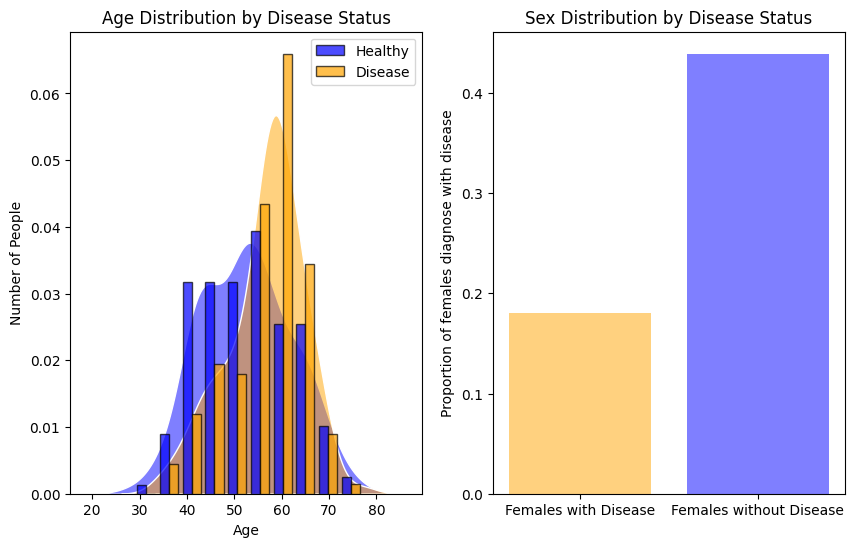

In [ ]:
plt.figure(figsize=(10,6));
plt.subplot(1,2,1)
sns.kdeplot(df_no_disease['age'],color='blue',edgecolor = 'white',fill = True,alpha = 0.5);
sns.kdeplot(df_disease['age'],color='orange',edgecolor = 'white',fill = True,alpha = 0.5);
plt.hist([df_no_disease['age'],df_disease['age']],bins = 10,stacked =False,label=['Healthy','Disease'],color=['blue', 'orange'],edgecolor = 'black',density = True,alpha = 0.7);
plt.xlabel('Age');
plt.ylabel('Number of People');
plt.title('Age Distribution by Disease Status');
plt.legend(loc = 'upper right');

plt.subplot(1,2,2)
plt.bar(['Females with Disease', 'Females without Disease'], [female_dis, female_no_dis], color=['orange', 'blue'],alpha =0.5)
plt.ylabel('Proportion of females diagnose with disease')
plt.title('Sex Distribution by Disease Status')




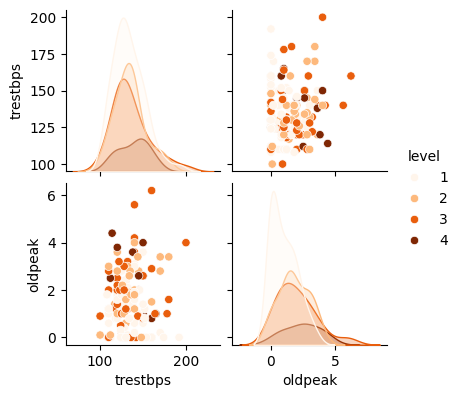

In [ ]:
sns.pairplot(df_disease[['trestbps','oldpeak','level']],hue = 'level', diag_kind='kde', palette='Oranges',height=2)
